In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import random

In [2]:
#Row
vmin = 1
vmax = 5
rowcount = 100

#Column
tpl_colname = [f"skill-{letter}" for letter in list(string.ascii_uppercase)]
colcount = len(tpl_colname)

data = np.random.randint(vmin, vmax+1, (rowcount, colcount))
df = pd.DataFrame(data, columns=tpl_colname)

df

,skill-A,skill-B,skill-C,skill-D,skill-E,skill-F,skill-G,skill-H,skill-I,skill-J,...,skill-Q,skill-R,skill-S,skill-T,skill-U,skill-V,skill-W,skill-X,skill-Y,skill-Z
0,4,3,3,1,5,4,5,5,3,4,...,2,4,4,2,1,1,4,4,4,5
1,1,4,3,4,1,1,5,1,3,3,...,5,1,4,5,5,1,4,4,4,3
2,1,3,2,4,5,4,3,5,2,2,...,4,1,5,3,5,5,4,5,4,3
3,1,2,2,2,1,5,3,3,3,1,...,4,3,5,3,1,3,2,1,5,2
4,5,2,3,5,1,2,4,2,2,1,...,3,5,1,5,2,3,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,5,4,4,4,2,2,1,5,5,...,1,1,2,3,3,2,3,4,4,1
96,2,4,2,3,2,3,3,5,5,1,...,4,1,2,2,2,5,1,2,5,1
97,3,5,1,3,5,1,4,1,2,2,...,3,4,3,1,2,1,2,5,2,5
98,4,5,5,5,3,4,2,4,2,3,...,1,1,4,2,3,5,5,5,4,2


In [20]:
from sklearn.cluster import KMeans
vec = KMeans(n_clusters=4, max_iter=1000)
group_num = vec.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
group_num

array([2, 0, 0, 3, 3, 0, 2, 1, 1, 0, 1, 3, 3, 0, 0, 3, 0, 0, 1, 1, 2, 0,
       1, 3, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 3, 2, 3, 0, 2, 0, 2, 1, 0, 2,
       1, 1, 0, 2, 0, 1, 0, 1, 3, 2, 3, 3, 1, 1, 0, 3, 2, 1, 3, 0, 1, 1,
       0, 2, 1, 0, 1, 1, 2, 1, 3, 0, 0, 2, 2, 3, 0, 2, 1, 2, 3, 1, 2, 1,
       2, 3, 3, 0, 2, 0, 1, 3, 1, 2, 1, 0], dtype=int32)

In [22]:
df_calc = df.copy()
df_calc['group_name'] = group_num
df_calc

,skill-A,skill-B,skill-C,skill-D,skill-E,skill-F,skill-G,skill-H,skill-I,skill-J,...,skill-R,skill-S,skill-T,skill-U,skill-V,skill-W,skill-X,skill-Y,skill-Z,group_name
0,4,3,3,1,5,4,5,5,3,4,...,4,4,2,1,1,4,4,4,5,2
1,1,4,3,4,1,1,5,1,3,3,...,1,4,5,5,1,4,4,4,3,0
2,1,3,2,4,5,4,3,5,2,2,...,1,5,3,5,5,4,5,4,3,0
3,1,2,2,2,1,5,3,3,3,1,...,3,5,3,1,3,2,1,5,2,3
4,5,2,3,5,1,2,4,2,2,1,...,5,1,5,2,3,1,1,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,5,4,4,4,2,2,1,5,5,...,1,2,3,3,2,3,4,4,1,3
96,2,4,2,3,2,3,3,5,5,1,...,1,2,2,2,5,1,2,5,1,1
97,3,5,1,3,5,1,4,1,2,2,...,4,3,1,2,1,2,5,2,5,2
98,4,5,5,5,3,4,2,4,2,3,...,1,4,2,3,5,5,5,4,2,1


In [23]:
df_calc.groupby('group_name').mean()

,skill-A,skill-B,skill-C,skill-D,skill-E,skill-F,skill-G,skill-H,skill-I,skill-J,...,skill-Q,skill-R,skill-S,skill-T,skill-U,skill-V,skill-W,skill-X,skill-Y,skill-Z
group_name,,,,,,,,,,,,,,,,,,,,,
0,2.689655,2.689655,2.896552,2.206897,3.103448,3.034483,3.413793,3.206897,2.689655,3.379310,...,2.896552,2.517241,3.172414,3.310345,4.172414,3.310345,3.517241,3.068966,2.931034,3.310345
1,3.250000,3.785714,3.357143,3.214286,3.571429,3.464286,2.607143,2.535714,3.142857,3.107143,...,3.571429,3.285714,2.964286,2.178571,2.464286,4.250000,2.500000,2.714286,3.607143,2.250000
2,3.333333,2.875000,2.291667,2.875000,3.125000,2.791667,3.000000,4.083333,3.000000,2.750000,...,3.291667,2.916667,2.625000,3.166667,2.250000,1.625000,3.583333,2.625000,3.708333,3.250000
3,2.052632,2.368421,3.526316,3.421053,1.842105,2.684211,2.947368,2.368421,3.368421,2.947368,...,2.631579,3.526316,3.052632,3.263158,2.157895,3.000000,2.052632,2.842105,2.315789,2.263158


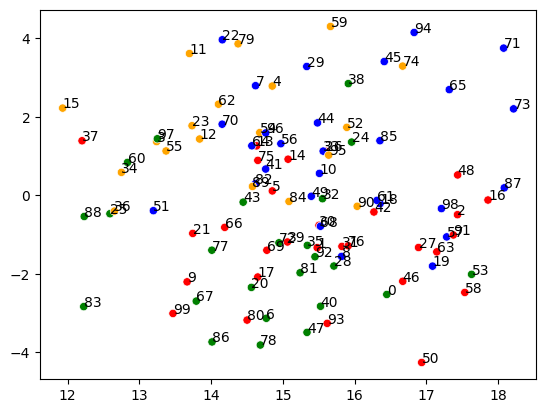

In [24]:
#Dimensionality Reduction with SVD
#2-D
from sklearn.decomposition import TruncatedSVD

model_svd = TruncatedSVD(n_components=3)
vecs_list = model_svd.fit_transform(df)

X = vecs_list[:,0]
Y = vecs_list[:,1]

color_code = {0:'red', 1:'blue', 2:'green', 3:'orange'}
colors = [color_code[x] for x in group_num]
sns.scatterplot(x=X, y=Y, color=colors)

for i,(annot_x, annot_y) in enumerate(zip(X,Y)):
  plt.annotate(df.index[i], (annot_x, annot_y))

#クラスタリングの精度が悪い場合はSVDをかえてみてもよい